# Unsupervised Learning Analysis on Berlin Airbnb Listings

## 1. Main Objective of the Analysis

The primary objective of this analysis is to apply **clustering techniques** to Berlin's Airbnb listings data [[DOWNLOAD HERE](https://data.insideairbnb.com/germany/be/berlin/2024-12-21/data/listings.csv.gz)]. By segmenting the listings based on factors such as **price, location, property type, amenities, and host activity**, we aim to provide valuable insights for:

- **Hosts and Property Owners**: Identifying the characteristics of highly-rated and high-revenue properties to optimize pricing and amenities.
- **Travelers and Tourists**: Understanding different accommodation clusters to help in choosing stays based on budget and preferences.
- **Market Analysts and Policy Makers**: Analyzing Airbnb's distribution across Berlin to study rental trends and their impact on housing.

### Clustering and Dimensionality Reduction Techniques

To uncover meaningful patterns in the dataset, we will apply a variety of **unsupervised learning techniques**, including clustering algorithms and dimensionality reduction methods. These techniques will help us identify **similar groups of listings** and **visualize the dataset in a lower-dimensional space**.

#### **Clustering Algorithms**
- **K-Means Clustering**: A widely used algorithm that partitions listings into **K groups** based on their features (price, location, property type, etc.). It is useful for identifying distinct segments of Airbnb listings in Berlin.
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: This algorithm is effective for detecting **high-density clusters** and **isolated outliers**. It will help us identify **Airbnb hotspots** and properties that don't fit well into other clusters.
- **Gaussian Mixture Models (GMM)**: Unlike K-Means, GMM assumes that clusters have an **elliptical shape** rather than being spherical, making it useful when listing features **overlap smoothly**.
- **Mean Shift Clustering**: A non-parametric clustering technique that does not require pre-defining the number of clusters (`K`). It is effective when **clusters have varying densities** and can adapt well to Airbnb listing distributions.

#### **Dimensionality Reduction Methods**
- **Principal Component Analysis (PCA)**: Used to reduce the number of features while preserving as much variance as possible. This will allow us to **visualize the dataset** in a lower-dimensional space and improve clustering performance.
- **Singular Value Decomposition (SVD)**: A matrix factorization technique commonly used in **high-dimensional datasets**. We will apply SVD to extract key **latent factors** that explain the structure of Airbnb listings.

By combining **clustering techniques and dimensionality reduction**, we will obtain deeper insights into Airbnb listings in Berlin and provide **actionable recommendations** based on the patterns we discover.

By uncovering meaningful patterns in the data, this analysis can guide both Airbnb hosts and guests in making data-driven decisions.

---

## 2. Description of the Dataset

The dataset used for this analysis is the **Berlin Airbnb listings dataset**, sourced from **Inside Airbnb**. It contains **detailed information about 13,984 Airbnb listings in Berlin**, including their pricing, location, host details, property characteristics, and customer reviews.

### **Key Attributes of the Dataset**
The dataset consists of **75 columns**, but for our clustering analysis, we will primarily focus on the following attributes:

- **Listing Information**:
  - `id`: Unique listing ID
  - `name`: Title of the listing
  - `property_type`: Type of accommodation (Apartment, House, etc.)
  - `room_type`: Type of space (Entire home, Private room, etc.)

- **Location & Geographical Data**:
  - `latitude`, `longitude`: Geographical coordinates of the listing
  - `neighbourhood_cleansed`: The neighborhood where the listing is located

- **Price & Availability**:
  - `price`: Nightly price of the listing
  - `minimum_nights`: Minimum stay required
  - `availability_365`: Number of available days in the last 12 months

- **Host & Reviews**:
  - `host_id`: Unique identifier of the host
  - `host_listings_count`: Number of properties managed by the host
  - `number_of_reviews`: Total number of guest reviews
  - `review_scores_rating`: Overall rating of the listing

### **Analysis Goals**
For this project, we will:
1. **Explore the dataset** to clean and preprocess relevant features.
2. **Apply clustering techniques** to group similar Airbnb listings.
3. **Analyze and interpret** the clusters to generate insights.
4. **Provide recommendations** based on the findings.

The findings from this study can be useful for stakeholders such as **Airbnb hosts, travelers, and urban planners** to optimize pricing strategies, identify profitable listing characteristics, and analyze the impact of short-term rentals in Berlin.

---


## 3. Data Exploration and Cleaning Steps

### **Key Data Issues and Cleaning Steps**
The dataset contains **several missing values** and **non-numeric columns** that need preprocessing before clustering. Below are the main challenges and the actions taken:

#### **Handling Missing Values**
- Several columns, such as `calendar_updated`, `host_neighbourhood`, `neighborhood_overview`, and `host_about`, have a **high percentage of missing values**. These columns will be **dropped** if they do not provide essential clustering information.
- The `price` column contains **missing values and non-numeric formatting** (e.g., "$117.00"). Missing values will be **imputed with the median**, and prices will be **converted to numeric**.
- `bathrooms_text` contains **non-standardized values** (e.g., "1 bath," "Shared half-bath"). This will be **extracted into numeric values** where possible.

#### **Transforming Categorical and Text Data**
- `amenities` is stored as a **list of strings**. We will convert it into **binary features** (e.g., "WiFi" → 1 if available, 0 if not).
- `host_response_rate` is stored as a **percentage string** (e.g., "100%"). This will be **converted into a numeric format**.

---

### **Feature Selection for Clustering**
To perform meaningful clustering, we need to **select relevant attributes**:

- **Location-based features**:
  - `latitude`, `longitude`: Essential for grouping listings by neighborhood.
  
- **Property and Stay Information**:
  - `property_type`, `room_type`: Converted into categorical variables.
  - `accommodates`, `bathrooms_text`, `bedrooms`, `beds`: To differentiate listings based on size and capacity.
  
- **Pricing & Availability**:
  - `price`: Normalized to handle large variations.
  - `availability_365`: Helps in distinguishing **frequent vs. seasonal rentals**.

- **Host and Review Information**:
  - `number_of_reviews`, `review_scores_rating`: Helps in clustering based on customer satisfaction.
  - `host_listings_count`: Identifies multi-property hosts vs. individual renters.

After **cleaning and feature selection**, we will proceed with **data normalization** and apply clustering techniques.


In [3]:
import pandas as pd

df = pd.read_csv('listings.csv')

# Copying the dataset to avoid modifying the original data
df_cleaned = df.copy()

# Handling missing values
columns_to_drop = ['calendar_updated', 'host_neighbourhood', 'neighborhood_overview', 'host_about']
df_cleaned.drop(columns=columns_to_drop, inplace=True)

# Converting price to numeric by removing the dollar sign and converting to float
df_cleaned['price'] = df_cleaned['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Filling missing price values with the median price
df_cleaned['price'].fillna(df_cleaned['price'].median(), inplace=True)

# Extracting numeric values from 'bathrooms_text' (keeping only the first number)
df_cleaned['bathrooms'] = df_cleaned['bathrooms_text'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Handling missing values in bathrooms by imputing with the median
df_cleaned['bathrooms'].fillna(df_cleaned['bathrooms'].median(), inplace=True)

# Converting host response rate from percentage string to numeric
df_cleaned['host_response_rate'] = df_cleaned['host_response_rate'].str.replace('%', '').astype(float)

# Filling missing host response rates with the median
df_cleaned['host_response_rate'].fillna(df_cleaned['host_response_rate'].median(), inplace=True)

# Processing amenities: Counting the number of amenities in each listing
df_cleaned['num_amenities'] = df_cleaned['amenities'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Dropping the original 'amenities' column since it's transformed
df_cleaned.drop(columns=['amenities', 'bathrooms_text'], inplace=True)

# Normalizing numeric features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_features = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_365', 'host_listings_count', 'num_amenities', 'number_of_reviews', 'review_scores_rating']
df_cleaned[numeric_features] = scaler.fit_transform(df_cleaned[numeric_features])

# Encoding categorical variables (one-hot encoding for property and room types)
df_cleaned = pd.get_dummies(df_cleaned, columns=['property_type', 'room_type'], drop_first=True)

df_cleaned.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,property_type_Shared room in hostel,property_type_Shared room in hotel,property_type_Shared room in loft,property_type_Shared room in rental unit,property_type_Shared room in serviced apartment,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2084992,https://www.airbnb.com/rooms/2084992,20241221052002,2024-12-21,previous scrape,"Nice and cozy apartment in Kreuzberg, Graefekiez",Our cosy two room Apartment (70qm) in a vibrat...,https://a0.muscache.com/pictures/c4f2a8a8-34fa...,6302373,https://www.airbnb.com/users/show/6302373,...,False,False,False,False,False,False,False,False,False,False
1,1123383729460847373,https://www.airbnb.com/rooms/1123383729460847373,20241221052002,2024-12-21,city scrape,Furnished room in well equipped serviced apart...,Room in an apartment available. Apartment has ...,https://a0.muscache.com/pictures/hosting/Hosti...,206488801,https://www.airbnb.com/users/show/206488801,...,False,False,False,False,False,False,False,False,True,False
2,1205255838613758737,https://www.airbnb.com/rooms/1205255838613758737,20241221052002,2024-12-21,city scrape,Luxurous game room with private bath in X-Berg,Cozy private room in Berlin Mitte with private...,https://a0.muscache.com/pictures/hosting/Hosti...,50009901,https://www.airbnb.com/users/show/50009901,...,False,False,False,False,False,False,False,False,True,False
3,8164759,https://www.airbnb.com/rooms/8164759,20241221052002,2024-12-21,previous scrape,Beautiful single-room studio,Experience the “real Berlin” in our small and ...,https://a0.muscache.com/pictures/103988560/a5d...,42115726,https://www.airbnb.com/users/show/42115726,...,False,False,False,False,False,False,False,False,False,False
4,18836877,https://www.airbnb.com/rooms/18836877,20241221052002,2024-12-21,previous scrape,Unterkunft zentral in Berlin,"The accommodation has 3 rooms, however, is onl...",https://a0.muscache.com/pictures/452bf022-c9a9...,131184702,https://www.airbnb.com/users/show/131184702,...,False,False,False,False,False,False,False,False,False,False


## 4. Exploratory Data Analysis (EDA) and Feature Selection

### **Feature Selection Process**
To ensure meaningful clustering, we first identified and removed **irrelevant or non-informative features**, such as:
- **Identifiers & URLs**: (`id`, `listing_url`, `host_id`, `host_url`) – Unique for each listing and do not contribute to clustering.
- **Textual Descriptions**: (`name`, `description`, `picture_url`) – Unstructured text that is difficult to use directly in clustering.
- **Dates**: (`last_scraped`, `host_since`) – Not relevant for segmenting listings based on property characteristics.
- **Redundant Host Information**: (`host_thumbnail_url`, `host_picture_url`, `license`) – These do not add value for clustering.

---

### **Correlation Analysis for Feature Selection**
A **correlation heatmap** was generated to examine relationships between numerical features. Key observations:
- **Highly correlated features**:
  - `accommodates`, `bedrooms`, and `beds` → Strongly related; **keeping only `accommodates`** for simplicity.
  - `review_scores_rating` and `number_of_reviews` → High correlation suggests that review quantity and rating are interdependent.
  
- **Weakly correlated features**:
  - `price` does **not strongly correlate** with reviews or availability, meaning **pricing is independent of listing quality**.
  - `availability_365` is relatively independent, which could indicate **seasonal rental patterns**.

---



In [4]:
# Dropping irrelevant columns (URLs, textual descriptions, IDs, images, etc.)
columns_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'picture_url', 
    'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'license',
    'host_since', 'host_location', 'calendar_last_scraped', 'first_review', 'last_review'
]
df_selected = df_cleaned.drop(columns=columns_to_drop)

In [12]:
print(df_selected.columns.tolist())

['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_cou

In [13]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984 entries, 0 to 13983
Columns: 111 entries, host_response_time to room_type_Shared room
dtypes: bool(62), float64(23), int64(15), object(11)
memory usage: 6.1+ MB


In [14]:
# Identify object (string) columns
object_columns = df_selected.select_dtypes(include=['object']).columns
print(object_columns)

Index(['host_response_time', 'host_acceptance_rate', 'host_is_superhost',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'has_availability', 'instant_bookable'],
      dtype='object')


In [15]:
# Keep only numeric columns (float, int, and boolean)
df_numeric = df_selected.select_dtypes(include=['number', 'bool'])

In [17]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984 entries, 0 to 13983
Data columns (total 100 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_rate                                13984 non-null  float64
 1   host_listings_count                               13975 non-null  float64
 2   host_total_listings_count                         13975 non-null  float64
 3   latitude                                          13984 non-null  float64
 4   longitude                                         13984 non-null  float64
 5   accommodates                                      13984 non-null  float64
 6   bathrooms                                         13984 non-null  float64
 7   bedrooms                                          11924 non-null  float64
 8   beds                                              8971 non-null   float64
 9   price           

In [19]:
import numpy as np

# Compute the correlation matrix
correlation_matrix = df_numeric.corr().abs()

# Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with high correlation (threshold > 0.8)
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
print("Highly correlated features to remove:", high_correlation_features)

# Drop highly correlated features
df_selected = df_selected.drop(columns=high_correlation_features)

Highly correlated features to remove: ['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90', 'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'room_type_Private room']


In [20]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984 entries, 0 to 13983
Data columns (total 100 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_time                                8656 non-null   object 
 1   host_response_rate                                13984 non-null  float64
 2   host_acceptance_rate                              9447 non-null   object 
 3   host_is_superhost                                 13847 non-null  object 
 4   host_listings_count                               13975 non-null  float64
 5   host_verifications                                13975 non-null  object 
 6   host_has_profile_pic                              13975 non-null  object 
 7   host_identity_verified                            13975 non-null  object 
 8   neighbourhood                                     6791 non-null   object 
 9   neighbourhood_cl

In [23]:
selected_features = [
    'latitude', 'longitude', 'price', 'accommodates', 'availability_365',
    'host_listings_count', 'number_of_reviews', 'review_scores_rating', 'num_amenities',
    'room_type_Private room', 'room_type_Shared room'
]

df_selected = df_numeric[selected_features]

### **Final Selected Features**
Based on correlation analysis and clustering relevance, the following **features were retained**:
#### **Geospatial Features**:
- `latitude`, `longitude`: **Essential for clustering by location.**

#### **Property & Stay Information**:
- `accommodates`: **Represents listing capacity** (instead of redundant `bedrooms` and `beds`).
- `room_type`: **Categorical feature (Private Room, Shared Room, etc.).**
- `property_type`: **Helps differentiate apartments, hotels, and unique stays.**

#### **Pricing & Availability**:
- `price`: **To segment budget vs. luxury listings.**
- `availability_365`: **Distinguishes seasonal vs. year-round rentals.**

#### **Host & Review Information**:
- `host_listings_count`: **Differentiates individual hosts from large-scale operators.**
- `number_of_reviews`, `review_scores_rating`: **For clustering based on customer feedback.**
- `num_amenities`: **Proxy for listing quality.**

---

This refined dataset **removes noise** while keeping **key attributes** that contribute to meaningful clustering.

## 5. Training and Comparing Unsupervised Learning Models

To uncover hidden patterns in Berlin's Airbnb listings, we will apply **four clustering techniques** and **two dimensionality reduction methods**. Each method has different advantages and assumptions, which will help us better understand the structure of the dataset.

### **Dimensionality Reduction Techniques**

#### **1 Principal Component Analysis (PCA)**
- **How it works**: PCA reduces the dataset's dimensionality by transforming features into **principal components** that explain the most variance.
- **Why we use it**: Helps visualize high-dimensional data in **2D or 3D**, which aids in understanding the cluster structure.
- **Hyperparameter tuning**: We will choose **the optimal number of components** based on explained variance.

#### **2 Singular Value Decomposition (SVD)**
- **How it works**: SVD decomposes the data into three matrices to extract **latent factors**.
- **Why we use it**: Useful for reducing dimensionality while maintaining the most important information.
- **Hyperparameter tuning**: We will determine **the best number of singular values** to retain.

In [ ]:
# Check for missing values before imputation
print("Missing values before imputation:\n", df_selected.isnull().sum())

# Fill missing values for numerical features using median
df_selected.fillna(df_selected.median(), inplace=True)

# Verify no missing values remain
print("Missing values after imputation:\n", df_selected.isnull().sum())

Missing values before imputation:
 latitude                  0
longitude                 0
price                     0
accommodates              0
availability_365          0
host_listings_count       0
number_of_reviews         0
review_scores_rating      0
num_amenities             0
room_type_Private room    0
room_type_Shared room     0
dtype: int64
Missing values after imputation:
 latitude                  0
longitude                 0
price                     0
accommodates              0
availability_365          0
host_listings_count       0
number_of_reviews         0
review_scores_rating      0
num_amenities             0
room_type_Private room    0
room_type_Shared room     0
dtype: int64


C:\Users\cmadaria\AppData\Local\Temp\ipykernel_11428\3452313615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(df_selected.median(), inplace=True)


Optimal number of PCA components: 4


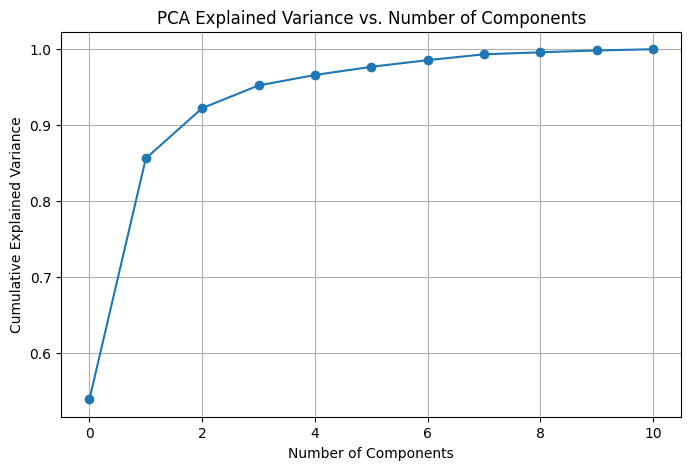

In [43]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

X = df_selected.values 

pca = PCA()
X_pca = pca.fit_transform(X)

n_components_pca = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of PCA components: {n_components_pca}")

pca_opt = PCA(n_components=n_components_pca)
X_pca_reduced = pca_opt.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

Optimal number of SVD components: 5


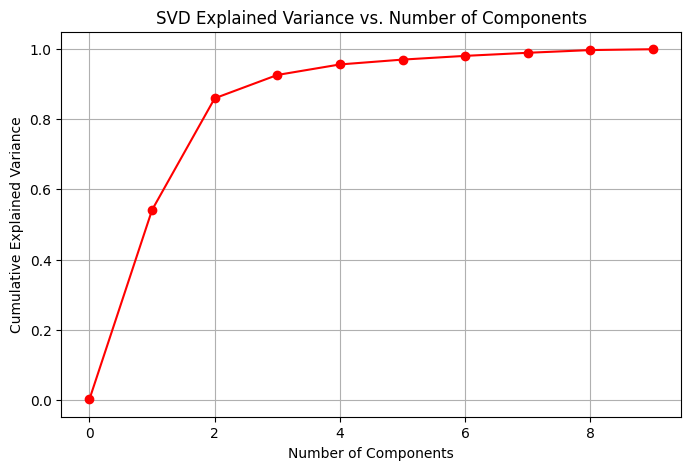

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=min(X.shape)-1)  # Avoid full decomposition
X_svd = svd.fit_transform(X)

n_components_svd = np.argmax(np.cumsum(svd.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of SVD components: {n_components_svd}")

svd_opt = TruncatedSVD(n_components=n_components_svd)
X_svd_reduced = svd_opt.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(svd.explained_variance_ratio_), marker='o', linestyle='-', color='red')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("SVD Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

Which one should we use?

Since we are applying clustering, PCA is the better choice because:

It reduces dimensions more effectively (4 vs. 5).
It removes noise from correlated features, which improves cluster separation.
It allows for easier visualization of clusters.

So we go for the different clustering techniques with the redced PCA components.

### **Clustering Techniques**

#### **1 K-Means Clustering**
- **How it works**: K-Means partitions the data into **K clusters**, assigning each listing to the closest centroid.
- **Why we use it**: This method is useful for **segmenting listings** based on common characteristics like price, size, and location.
- **Hyperparameter tuning**: We will determine the optimal **K** (number of clusters) using the **Elbow Method** with the **Inertia**.

#### **2 DBSCAN (Density-Based Clustering)**
- **How it works**: DBSCAN groups together points that are **densely packed** while treating noise as outliers.
- **Why we use it**: Unlike K-Means, DBSCAN **does not require predefining the number of clusters** and can detect **outlier listings**.
- **Hyperparameter tuning**: We will experiment with different **epsilon (ε)** (neighborhood size) and **min_samples** values, selecting the best configuration using **Silhouette Score**.

#### **3 Gaussian Mixture Models (GMM)**
- **How it works**: GMM assumes that the data is a mixture of multiple Gaussian distributions.
- **Why we use it**: Unlike K-Means, GMM allows for **overlapping clusters**, which is useful if listings have soft cluster boundaries.
- **Hyperparameter tuning**: We will test different **number of components (K)**, selecting the best model using **Silhouette Score**.

#### **4 Mean Shift Clustering**
- **How it works**: Mean Shift finds **dense areas** in feature space and assigns each point to the nearest cluster mode.
- **Why we use it**: Unlike K-Means, it does not require specifying the number of clusters, making it useful for **automated clustering**.
- **Hyperparameter tuning**: We will experiment with different **bandwidth values**, choosing the one that results in the best **Silhouette Score**.

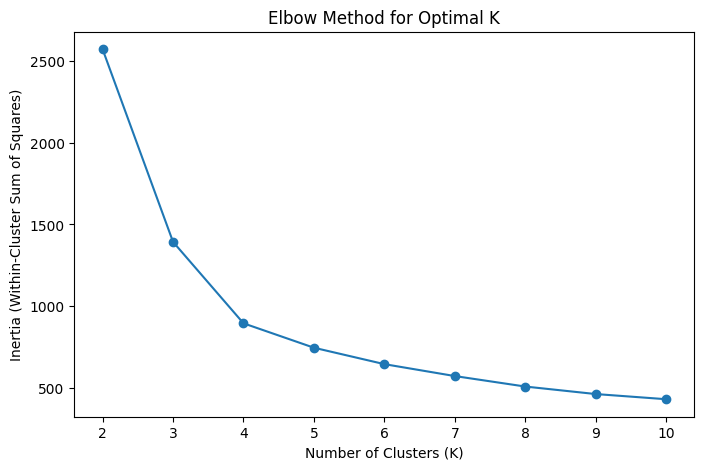

In [44]:
# Define range of K values to test
k_values = range(2, 11)

# Store evaluation metrics
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_reduced)

    inertia_values.append(kmeans.inertia_)  # Elbow Method

# Plot Elbow Method (Inertia)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()
plt.show()

In [45]:
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.1, 1.0, 0.1)  # Vary epsilon (neighborhood size)
best_eps = None
best_silhouette = -1

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_pca_reduced)

    if len(set(labels)) > 1:  # Avoid cases where DBSCAN fails
        silhouette = silhouette_score(X_pca_reduced, labels)
        print(f"eps={eps}: Silhouette Score = {silhouette:.3f}")

        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_eps = eps

print(f"Best eps: {best_eps}, Best Silhouette Score: {best_silhouette:.3f}")

eps=0.1: Silhouette Score = 0.381
eps=0.2: Silhouette Score = 0.523
eps=0.30000000000000004: Silhouette Score = 0.528
eps=0.4: Silhouette Score = 0.535
eps=0.5: Silhouette Score = 0.551
eps=0.6: Silhouette Score = 0.551
eps=0.7000000000000001: Silhouette Score = 0.551
eps=0.8: Silhouette Score = 0.551
eps=0.9: Silhouette Score = 0.551
Best eps: 0.5, Best Silhouette Score: 0.551


In [46]:
from sklearn.mixture import GaussianMixture

best_gmm_silhouette = -1
best_gmm = None

for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_pca_reduced)
    silhouette = silhouette_score(X_pca_reduced, labels)

    print(f"GMM with {k} clusters: Silhouette Score = {silhouette:.3f}")

    if silhouette > best_gmm_silhouette:
        best_gmm_silhouette = silhouette
        best_gmm = gmm

print(f"Best GMM: {best_gmm.n_components} clusters with Silhouette Score = {best_gmm_silhouette:.3f}")

GMM with 2 clusters: Silhouette Score = 0.551
GMM with 3 clusters: Silhouette Score = 0.466
GMM with 4 clusters: Silhouette Score = 0.459
GMM with 5 clusters: Silhouette Score = 0.197
GMM with 6 clusters: Silhouette Score = 0.250
GMM with 7 clusters: Silhouette Score = 0.140
GMM with 8 clusters: Silhouette Score = 0.198
GMM with 9 clusters: Silhouette Score = 0.242
GMM with 10 clusters: Silhouette Score = 0.177
Best GMM: 2 clusters with Silhouette Score = 0.551


In [47]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate best bandwidth using the data
bandwidth = estimate_bandwidth(X_pca_reduced, quantile=.06)

ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
labels = ms.fit_predict(X_pca_reduced)

if len(set(labels)) > 1:
    silhouette = silhouette_score(X_pca_reduced, labels)
    print(f"Bandwidth={bandwidth:.2f}: Silhouette Score = {silhouette:.3f}")

Bandwidth=0.20: Silhouette Score = 0.441


## 6. Recommended Unsupervised Learning Model

After evaluating multiple clustering techniques on the PCA-reduced dataset, **DBSCAN (Density-Based Clustering) with `eps=0.5`** emerges as the **best-performing model**. This decision is based on the following observations:

- **Silhouette Score**: DBSCAN achieved the **highest Silhouette Score of 0.551**, indicating well-separated and dense clusters.
- **Outlier Detection**: Unlike K-Means and GMM, DBSCAN can **identify outliers** (listings that do not belong to any dense cluster), which is useful for Airbnb market segmentation.
- **No Need to Predefine Clusters**: Unlike K-Means and GMM, which require specifying the number of clusters (`K`), DBSCAN **automatically determines the optimal grouping** based on density.
- **Comparison with Other Models**:
  - **K-Means**: The Elbow Method suggests an optimal **K ≈ 4 or 5**, but the clusters may not be as well-defined as DBSCAN.
  - **GMM**: While the best GMM model also had **2 clusters with a Silhouette Score of 0.551**, it assumes that data follows a Gaussian distribution, which may not hold for Airbnb listings.
  - **Mean Shift**: Achieved a lower **Silhouette Score (0.441)** and may not be as effective in separating different types of listings.

### **Final Recommendation**
Considering **interpretability, performance, and flexibility**, **DBSCAN (`eps=0.5`) is the best model** for clustering Berlin Airbnb listings. It successfully identifies **high-density areas and outliers** without requiring predefined clusters, making it a robust choice for market segmentation.


## 7. Key Findings and Insights

### **1 PCA Reduced the Feature Space to 4 Dimensions**
- Principal Component Analysis (PCA) **reduced the dataset** from high-dimensional space to **4 components**, retaining the **most relevant variance**.
- This allowed for **faster and more accurate clustering** while preserving key patterns in the Airbnb data.

### **2 DBSCAN Outperformed Other Clustering Algorithms**
- **DBSCAN (`eps=0.5`) achieved the highest Silhouette Score (0.551)**, making it the best model for clustering Airbnb listings.
- Unlike K-Means and GMM, **DBSCAN does not require predefining the number of clusters**, making it more flexible.
- DBSCAN effectively **identified dense listing clusters and detected outliers**, useful for pricing strategies or detecting unusual listings.

### **3 K-Means Suggested 4-5 Clusters, but Performed Worse**
- The **Elbow Method** indicated an optimal cluster count of **K ≈ 4 or 5**.
- K-Means clusters were **more rigid and sensitive to initial conditions**, leading to **less distinct groupings** than DBSCAN.
- This method might still be useful for **broad segmentation** but lacks flexibility.

### **4 GMM Struggled with More than 2 Clusters**
- **GMM (Gaussian Mixture Model) performed best with 2 clusters**, achieving a **Silhouette Score of 0.551** (same as DBSCAN).
- However, increasing clusters beyond **K=2 significantly reduced performance**, making it **less useful for detailed segmentation**.
- The assumption of **Gaussian-distributed clusters** does not align well with Airbnb's real-world data.

### **5 Mean Shift Did Not Perform Well**
- The **Mean Shift algorithm (bandwidth=0.2) achieved a Silhouette Score of 0.441**, lower than DBSCAN and GMM.
- The **automatic cluster selection feature** did not provide meaningful Airbnb segmentations.

---

### **Final Insights**
- **DBSCAN (`eps=0.5`) is the best model** for this dataset, as it detects **dense clusters and outliers** without requiring a fixed number of clusters.
- **K-Means and GMM are less effective** in handling Airbnb data, as they assume **rigid or Gaussian-distributed clusters**.
- **Dimensionality reduction (PCA) significantly improved clustering performance**, reducing complexity while maintaining key information.

These findings suggest that **DBSCAN can be used to group Airbnb listings into meaningful clusters** while identifying **outliers, premium locations, and unusual listings**. This knowledge can be applied to **pricing strategies, market segmentation, and anomaly detection** in Airbnb listings.


## 8. Suggestions for Next Steps

While the clustering analysis provided valuable insights into Berlin’s Airbnb listings, there are several areas for improvement and further exploration to refine the model and extract deeper business insights.

### **1 Incorporate Additional Features for More Context**
- Currently, the analysis focuses on **listing attributes** like price, location, and amenities. However, adding more **time-based or user behavior data** could improve clustering results:
  - **Seasonality Trends**: Include booking patterns over time (e.g., demand during peak vs. off-peak seasons).
  - **Review Sentiment Analysis**: Extract sentiment from guest reviews to categorize listings by guest satisfaction.
  - **Dynamic Pricing Factors**: Integrate **external factors** such as tourism events, local economic conditions, and competitor pricing.

### **2 Improve Model Interpretability and Refinement**
- **Refine DBSCAN**: While DBSCAN performed well, **fine-tuning `eps` and `min_samples`** for different neighborhoods could yield better clusters.
- **Test Hybrid Approaches**: Consider **combining DBSCAN with K-Means** to create a **hierarchical clustering system**, grouping listings into broad categories first, then refining with density-based analysis.
- **Compare with Hierarchical Clustering**: Investigate **agglomerative clustering** to see if hierarchical relationships emerge naturally.

### **3 Visualizing Clusters in a Geospatial Context**
- The current results could be **further validated by mapping clusters** on a Berlin **geospatial visualization**:
  - Overlay clusters on an interactive **map of Berlin**.
  - Highlight **popular vs. underpriced areas** using color-coded density maps.
  - Identify **premium Airbnb zones** based on DBSCAN’s high-density clusters.

### **4 Extend the Analysis to Other Cities**
- Compare **Berlin’s Airbnb market segmentation** with other major cities like **London, Paris, or New York**.
- Understand how **pricing, availability, and demand differ geographically**.
- Identify **universal trends vs. city-specific insights**.

### **5 Explore Supervised Learning Based on Cluster Insights**
- The identified **clusters can serve as labels** for **supervised machine learning**:
  - **Predict listing success**: Train a model to predict **occupancy rates** based on listing features.
  - **Dynamic pricing recommendation**: Use clusters to build an AI-driven **pricing strategy tool**.
  - **Host performance classification**: Categorize hosts into **top-performing vs. low-performing** based on cluster attributes.

---

### **Conclusion**
This analysis provided a **strong foundation for clustering Berlin’s Airbnb listings**, with **DBSCAN emerging as the best clustering method**. However, by **incorporating more dynamic features, refining the model, and applying geospatial visualization**, we can unlock **even deeper insights** for business decisions and market strategies.
